Data processing complete -- Printing Velocity Contour Animation


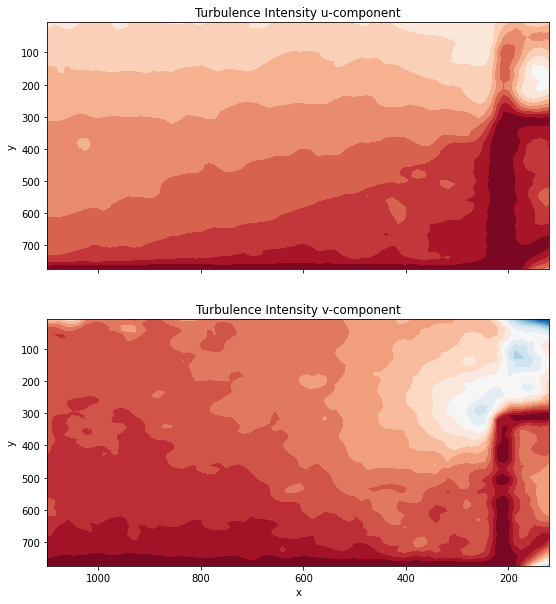

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
# np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=np.inf)

######################################################## 

#Reading in PIV Vector Data
fileroot = f'{sys.path[0]}/V20_front_01run/PLT_WS24/'
fileprefix = 'B00'
fileext = '.plt'

#Process this many frames from dataset
frames = 100 #average mean over this number of frames
total_frames = 10 #Shift animation over this number of frames

#Initialise storage arrays
u_mean_store = np.zeros((7062,1), dtype = float)
v_mean_store = np.zeros((7062,1), dtype = float)
uv_mean_store = np.zeros((7062,1), dtype = float)
urms_store = np.zeros((7062,1), dtype = float)
vrms_store = np.zeros((7062,1), dtype = float)

for i in range(total_frames):
    
    #Reset U and V Component Summations to Zero
    u_sum = np.zeros((7062,1), dtype = float)
    v_sum = np.zeros((7062,1), dtype = float)
    u_sqrd_sum = np.zeros((7062,1), dtype = float)
    v_sqrd_sum = np.zeros((7062,1), dtype = float)

    for j in range(i,frames+i):
        filenum = '{0:03}'.format(j+1)
        filepath = fileroot + fileprefix + filenum + fileext
        df = pd.read_csv (filepath, sep = " ") 
        shapedf= df.shape[1]

        #The textfiles are not clean and have trailing whitespaces at random files.
        #This if statement will catch the extra whitespace discrepansy in this specific data set and drop columns.
        if shapedf == 5:
            df.drop((df.columns)[[-1,-1]],axis=1,inplace=True)
        elif shapedf == 6:
            df.drop((df.columns)[[-1,-2]],axis=1,inplace=True)

        #Drop last to columns
        df.drop(index=df.index[0:106],inplace=True) #Dropping remaining data to keep reshape intervals constant

        #Append column names
        df.columns = ["x","y","u","v"]

        #Summing Velocity Components using the u and v components
        u_sum = u_sum + pd.DataFrame(df['u']).to_numpy()*-1
        v_sum = v_sum + pd.DataFrame(df['v']).to_numpy()*-1
        u_sqrd_sum = u_sqrd_sum + pd.DataFrame(df['u']).to_numpy()**2
        v_sqrd_sum = v_sqrd_sum + pd.DataFrame(df['v']).to_numpy()**2
        
        #Meshgrid to plot velocity data on image cooridinates
        xstep = np.arange(df['x'].min(),df['x'].max(),12)
        ystep = np.arange(df['y'].min(),df['y'].max(),12)
        xx , yy = np.meshgrid(xstep,ystep)
    
    #Calculate Time Averaged Velocity Components as Mean and Root Mean Square Data
    u_mean = u_sum/frames
    v_mean = v_sum/frames
    uv_mean = np.sqrt(u_mean**2 + v_mean**2)
    urms = np.sqrt(u_sqrd_sum/frames)
    vrms = np.sqrt(v_sqrd_sum/frames)
    
    #Appending and Storing Data in Storage Arrays
    u_mean_store = np.hstack((u_mean, u_mean_store)) 
    v_mean_store = np.hstack((v_mean, v_mean_store)) 
    uv_mean_store = np.hstack((uv_mean, uv_mean_store)) 
    urms_store = np.hstack((urms, urms_store))
    vrms_store = np.hstack((vrms, vrms_store))

    
print('Data processing complete -- Printing Velocity Contour Animation')

######################################################## 

# fig, ax = plt.subplots(figsize=(16,6))
# plt.contourf(xx,yy,df_vel_mean, 25)
# title_str = "Mean Velocity Contour Plot"      
# plt.gca()
# plt.title(title_str)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
# plt.show()

# plt.savefig('~/work/pywork/pyprojects/Filip/pivAero/meanUV.jpg')

######################################################## 

#Function to reset formatting after each frame
def init_func():
    
    ax4.clear()
#     ax4.set_xlabel('x')
    ax4.set_ylabel('y')
    ax4.invert_yaxis()
    ax4.invert_xaxis()
    ax4.add_patch(rectu_4)
    ax4.add_patch(rectl_4)
    ax4.set_xlim(1100,120)
    plt.setp(ax4,xticklabels=[])
    ax4.set_title("Turbulence Intensity u-component")
    
    ax5.clear()
    ax5.set_xlabel('x')
    ax5.set_ylabel('y')
    ax5.invert_yaxis()
    ax5.invert_xaxis()
    ax5.add_patch(rectu_5)
    ax5.add_patch(rectl_5)
    ax5.set_xlim(1100,120)
    ax5.set_title("Turbulence Intensity v-component")


#Function to animate plot with new after each frame
def update_plot(i):
    
    frame  = '{0:03}'.format(i+1)
    
    urms_field = np.reshape(urms_store [:,(urms_store.shape[1])-i-1],(66,107))
    urms_field = np.delete(urms_field, 65, axis=0) #Deleting 1 row to align shape with meshgrid
    urms_field = np.delete(urms_field, 106, axis=1) #Deleting 1 col to align shape with meshgrid
    
    vrms_field = np.reshape(vrms_store [:,(vrms_store.shape[1])-i-1],(66,107))
    vrms_field = np.delete(vrms_field, 65, axis=0) #Deleting 1 row to align shape with meshgrid
    vrms_field = np.delete(vrms_field, 106, axis=1) #Deleting 1 col to align shape with meshgrid

    levels = 20
    
    ax4.contourf(xx,yy,urms_field, levels, cmap='RdBu')
    ax5.contourf(xx,yy,vrms_field, levels, cmap='RdBu')
    

#     title_str = "Frame:" + frame                                
#     plt.title(title_str)

########################################################     
    
#Creating Animation
#Initialise figure to prepare for animation function
fig, ((ax4,ax5)) = plt.subplots(nrows=2, ncols=1,figsize = (9,10))

rectu_4 = patches.Rectangle((6, 300), 210, 474, linewidth=2, edgecolor='black', facecolor='grey')
rectl_4 = patches.Rectangle((216, 754), 850, 20, linewidth=2, edgecolor='black', facecolor='grey')

rectu_5 = patches.Rectangle((6, 300), 210, 474, linewidth=2, edgecolor='black', facecolor='grey')
rectl_5 = patches.Rectangle((216, 754), 850, 20, linewidth=2, edgecolor='black', facecolor='grey')


anim = animation.FuncAnimation(fig,update_plot,frames = total_frames, init_func = init_func)        

#Writing animation to gif file
f = f"{sys.path[0]}/results/piv-front-turb-results.gif" 
writergif = animation.PillowWriter(fps=10) 
anim.save(f, writer=writergif)
